# Esercizio 4


# Esercizio 4.1

### Exercise 04.1

In Statistical Mechanics the Maxwell–Boltzmann distribution (<a href="https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution" target="_blank">Link Wikipedia</a>) is a probability distribution used for describing particle speeds in idealized gases. However, rarefied gases at ordinary temperatures behave very nearly like an ideal gas and the Maxwell–Boltzmann speed distribution is an excellent approximation for such gases. For a 3D system its formula is:
$$p(v,T) = \left( \frac{m}{2\pi k_B T} \right)^{3/2} 4\pi v^2 e^{-\frac{m v^2}{2 k_B T}}$$

By using LJ reduced units (Lenght: $\sigma$; Energy: $\epsilon$; Mass: the mass, $m$, of the particles; Temperature: $\epsilon/k_B$; velocity: $\sqrt{\epsilon/m}$) its form becomes:
$$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$

The NSL_SIMULATOR code already computes the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$.

Include the calculation of the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, inside your Molecular Dynamics code by using data blocking to obtain single block averages, progressive average values and progressive uncertainties for $p(v^*,T^*)$.

Remember that, the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, can be approximately computed as a **normalized histogram** on an appropriate interval $\left[ 0, v_{max}\right]$ and chosing the number of bins into which you want to divide this interval.

There were three points where I needed to complete the code to solve this problem. 

`void System :: initialize_properties()`: I created the bins to save the probabilities of the velocities of the system. 

Then in void `void System :: measure()` I fixed the velocity measurements by filling in the indices that were reserved for these measurements. I addressed an array overflow issue by placing all velocities greater than $3 \sigma^2$ in the last bin. The effects of this choice (which can be reconsidered) can be observed in the graph. 
This is the actual code:
```cpp
if (_measure_pofv){
    for (int i=0; i<_npart; i++){
      double v_max = pow(2,1.5)*sqrt(_temp)/sqrt(M_PI) + 5 * _temp*(3 - (8.0/M_PI));
      double v = sqrt(dot(_particle(i).getvelocity(), _particle(i).getvelocity()));
      if (v >v_max){
        _measurement(_index_pofv + _n_bins_v - 1) ++;
      }
      else
        _measurement(_index_pofv + int(v/_bin_size_v)) ++;
    }
  }
```

I also had to implement in `void System :: averages()` the printing the data I produced to a dedicated file. This data allows me to verify the crystal's behavior. 
```cpp
if (_measure_pofv){
    double v_max = pow(2,1.5)*sqrt(_temp)/sqrt(M_PI) + 5 * _temp*(3 - (8.0/M_PI));
    coutf.open("../OUTPUT/pofv.dat", ios::app);
    for (int i = 0; i < _n_bins_v; i++){
      average  = _average(_index_pofv + i);
      sum_average = _global_av(_index_pofv + i);
      sum_ave2 = _global_av2(_index_pofv + i);
      coutf << setw(12) << blk
            << setw(12) << v_max * (i + 0.5) / double(_n_bins_v)
            << setw(12) << sum_average/(double(blk))
            << setw(12) << this->error(sum_average, sum_ave2, blk)<< endl;
    }
  coutf.close();
}
```
To generate the histogram, I had to calculate the first two moments of the $$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$ I then selected the maximum velocity as v_mean + 3σ².

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy, maxwell
from scipy.optimize import curve_fit

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_1348/2019761269.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('NSL_SIMULATOR/OUTPUT_first_run/pofv.dat', header=None, skiprows=1, delim_whitespace=True)


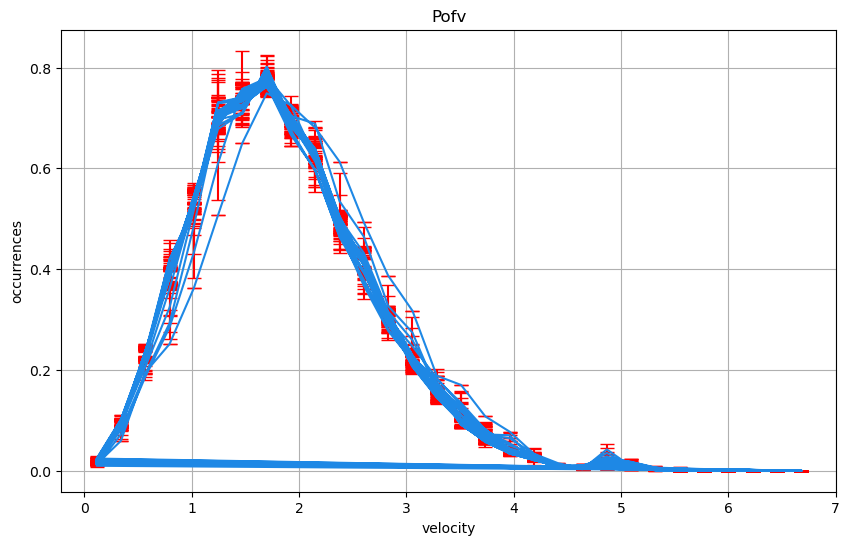

In [3]:
# Read the data and skip the first row (header)
data = pd.read_csv('NSL_SIMULATOR/OUTPUT_first_run/pofv.dat', header=None, skiprows=1, delim_whitespace=True)

# Extract the columns
x = data[1]
y = data[2]/(108*2*4/np.sqrt(np.pi)/30)
yerr = data[3]/(108*2*4/np.sqrt(np.pi)/30)

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, color='#1E88E5', ecolor='r', capsize=5)
plt.xlabel('velocity')
plt.ylabel('occurrences')
plt.title('Pofv')
plt.grid(True)
plt.show()

## Esercizio 4.2

By means of your upgraded code, perform MD simulations via a Lennard-Jones model ( e.g. Argon parameters: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- gas phase: $\rho^\star = 0.05$, $T^\star \sim  2.0$ (cut-off radius: $r_c = 5.0$)

starting from a **very low entropic** initial configuration:
1. initial **particle positions**: fcc crystal occupying half of the simulation box in each dimension
2. initial **velocity distribution**: $p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$ where $v_{T^*}$ is suitably connected to $T^*$. For example, this condition could be obtained by imposing that every particle has an initial velocity $\pm v_{T^*}$ for **only one** of its velocity components: $v_x$, $v_y$, $v_z$.

The goal is to show that, by evolving such initial condition via a Molecular Dynamics simulation, the velocity distribution tends to approximate the Maxwell–Boltzmann distribution.

- **Produce some pictures that show this convergence**
- The evolution of the system moves towards the increasing of entropy (more homeogeneous configuration of particles)? What would you find by changing the direction of time? Comment on these aspects in your jupyter-notebook


# The Delta Start

/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_1348/3294639111.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_reverse = pd.read_csv('NSL_SIMULATOR/OUTPUT_for_delta/pofv.dat', header=None, skiprows=1, delim_whitespace=True)


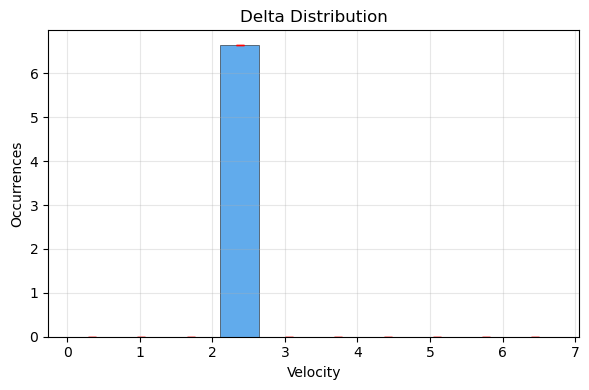

In [4]:
data_reverse = pd.read_csv('NSL_SIMULATOR/OUTPUT_for_delta/pofv.dat', header=None, skiprows=1, delim_whitespace=True)

first_30_data_reverse = data_reverse.iloc[:30]

step = 3 
reduced_data = []
for i in range(0, len(first_30_data_reverse), step):
    group = first_30_data_reverse.iloc[i:i+step]
    avg_x = group[1].mean()
    sum_y = group[2].sum()
    sum_err = np.sqrt((group[3]**2).sum())  
    reduced_data.append([avg_x, sum_y, sum_err])

reduced_df = pd.DataFrame(reduced_data, columns=['x', 'y', 'err'])

x_first_reverse = reduced_df['x']
y_first_reverse = reduced_df['y'] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_first_reverse = reduced_df['err'] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

bin_width = np.diff(x_first_reverse).mean() if len(x_first_reverse) > 1 else 0.1
bin_edges = np.append(x_first_reverse - bin_width/2, x_first_reverse.iloc[-1] + bin_width/2)

plt.figure(figsize=(6, 4))

plt.bar(x_first_reverse, y_first_reverse, 
        width=bin_width*0.8, 
        yerr=yerr_first_reverse, 
        capsize=3,
        color='#1E88E5', 
        alpha=0.7,
        edgecolor='black',
        linewidth=0.5,
        error_kw={'ecolor': 'red', 'capthick': 1})

plt.title('Delta Distribution')
plt.xlabel('Velocity')
plt.ylabel('Occurrences')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# The fast convergence

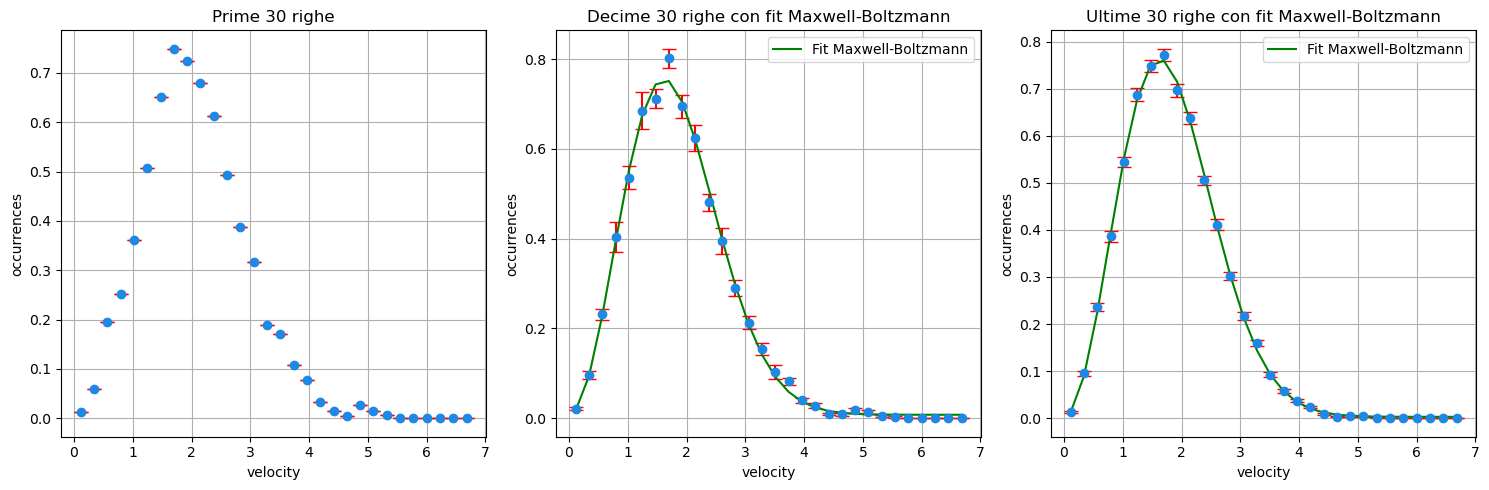

Temperatura associata al valore di b per le decime 30 righe: T = 1.3007
Temperatura associata al valore di b per le ultime 30 righe: T = 1.3165


In [5]:
# Funzione di Maxwell-Boltzmann per il fit
def maxwell_boltzmann(x, a, b, c):
    return a * x**2 * np.exp(-b * x**2) + c

# Define the required variables
first_30_data = data.iloc[:30]
tenth_30_data = data.iloc[270:300]
last_30_data = data.iloc[-30:]

x_first = first_30_data[1]
y_first = first_30_data[2] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_first = first_30_data[3] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

x_tenth = tenth_30_data[1]
y_tenth = tenth_30_data[2] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_tenth = tenth_30_data[3] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

x_last = last_30_data[1]
y_last = last_30_data[2] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_last = last_30_data[3] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

# Fit per le decime 30 righe
popt_tenth, _ = curve_fit(maxwell_boltzmann, x_tenth, y_tenth, p0=[1, 1, 0])

# Fit per le ultime 30 righe
popt_last, _ = curve_fit(maxwell_boltzmann, x_last, y_last, p0=[1, 1, 0])

# Creazione dei grafici
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Primo grafico: prime 30 righe
axs[0].errorbar(x_first, y_first, yerr=yerr_first, fmt = 'o', color='#1E88E5', ecolor='r', capsize=5)
axs[0].set_title('Prime 30 righe')
axs[0].set_xlabel('velocity')
axs[0].set_ylabel('occurrences')
axs[0].grid(True)

# Secondo grafico: decime 30 righe con fit
axs[1].errorbar(x_tenth, y_tenth, yerr=yerr_tenth, fmt = 'o',color='#1E88E5', ecolor='r', capsize=5)
axs[1].plot(x_tenth, maxwell_boltzmann(x_tenth, *popt_tenth), label='Fit Maxwell-Boltzmann', color='green')
axs[1].set_title('Decime 30 righe con fit Maxwell-Boltzmann')
axs[1].set_xlabel('velocity')
axs[1].set_ylabel('occurrences')
axs[1].legend()
axs[1].grid(True)

# Terzo grafico: ultime 30 righe con fit
axs[2].errorbar(x_last, y_last, yerr=yerr_last, fmt = 'o',color='#1E88E5', ecolor='r', capsize=5)
axs[2].plot(x_last, maxwell_boltzmann(x_last, *popt_last), label='Fit Maxwell-Boltzmann', color='green')
axs[2].set_title('Ultime 30 righe con fit Maxwell-Boltzmann')
axs[2].set_xlabel('velocity')
axs[2].set_ylabel('occurrences')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Calcolo della temperatura associata al valore di b
# La relazione tra b e la temperatura è T = 1 / (2 * b)
T_tenth = 1 / (2 * popt_tenth[1])
T_last = 1 / (2 * popt_last[1])

# Stampa dei valori di temperatura
print(f"Temperatura associata al valore di b per le decime 30 righe: T = {T_tenth:.4f}")
print(f"Temperatura associata al valore di b per le ultime 30 righe: T = {T_last:.4f}")

# The animation
**The animation of the evolution is called 'animationandata.mp4'.** 

It is possible to see the low-entropy starting configuration in which the molecules occupy only 1/8 of the available volume. The molecules begin to move according to what was said above. All with the same velocity directed totally along one axis. After a short time it is already possible to notice that the visual aspect of the simulation is that of a gas. From the graphs, in fact, it can be seen that after just a short time the velocity distribution is comparable to the Maxwell-Boltzmann distribution.


## Esercizio 4.3
Starting from the final state of an **equilibrated** MD simulation of the system in Exercise 04.2, by changing the direction of time (e.g. by inverting the final velocities, i.e. ... ), try to return back to the very low entropic initial configuration of Exercise 04.2. Is this possible? (for example, one can monitor the behavior of the average **potential energy** and the average **temperature** in **each block** as a function of time going **in both directions**. Show some picture and comment on what you find in your jupyter-notebook.

To solve this exercise I exploited the structure already provided by the delivered code. In fact, by inserting the phrase `RESTART 1` in the input.dat file, you enter a code section that allows the resolution. However, it is necessary to prepare the starting configurations in the correct way. Before re-running the code with this flag, it was necessary to copy the `config.xyz` and `conf-1.xyz` files, obtained from the execution of the previous code, respectively into the `conf-1.xyz` and `config.xyz` files in the input folder. By thus inverting the temporal positions of the last two configurations, it is possible to give the correct information to the code that calculates the velocities correctly.
I also had to modify another point in the code. In fact, in the position assignment process for exercise 4.2, in order to generate a low-entropy configuration, we localized all the molecules in only 1/8 of the simulation volume while after thermalizing they uniformly occupied all that space. It was therefore necessary to remove the `/2` in these lines of code:

```cpp
void System :: initialize_velocities(){
   //portion of code
    for(int i=0; i<_npart; i++){
        cinf >> particle >> xold >> yold >> zold; // units of coordinates in conf.xyz is _side
        _particle(i).setpositold(0, this->pbc(_side(0)*xold/2, 0)); // << this line
        _particle(i).setpositold(1, this->pbc(_side(1)*yold/2, 1)); // << this line
        _particle(i).setpositold(2, this->pbc(_side(2)*zold/2, 2)); // << this line
    } 
    //portion of code
}
```


/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_1348/726086677.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_reverse = pd.read_csv('NSL_SIMULATOR/OUTPUT_reverse/pofv.dat', header=None, skiprows=1, delim_whitespace=True)


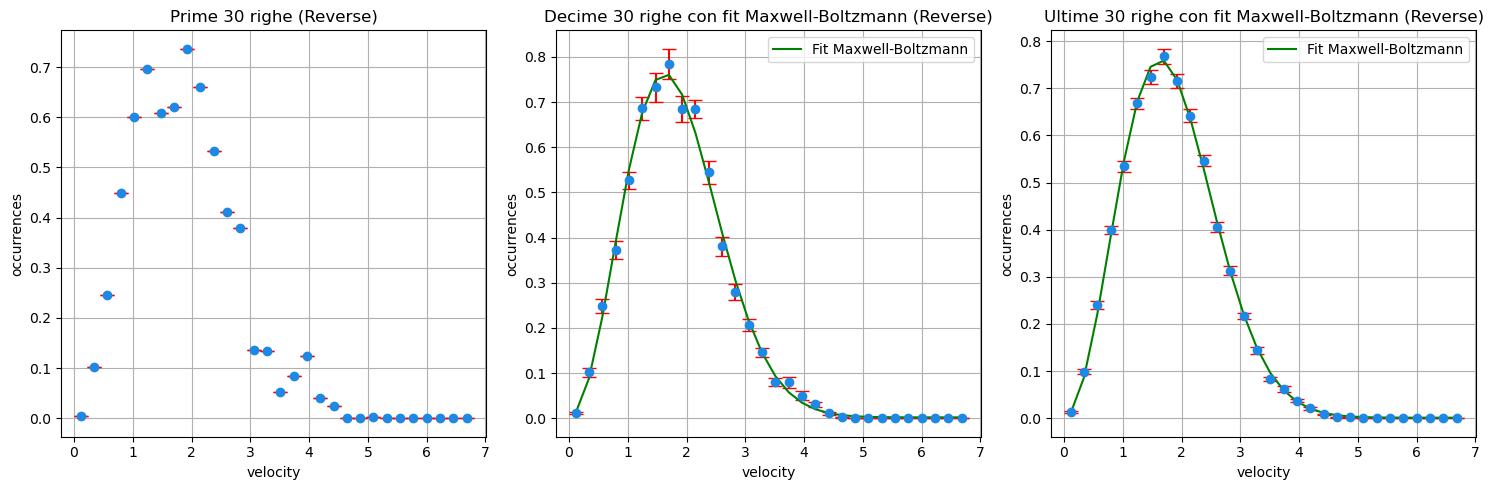

In [6]:
# Ricarica i dati dai file
data_reverse = pd.read_csv('NSL_SIMULATOR/OUTPUT_reverse/pofv.dat', header=None, skiprows=1, delim_whitespace=True)

# Estrai le colonne
x_reverse = data_reverse[1]
y_reverse = data_reverse[2] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_reverse = data_reverse[3] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

# Dividi i dati in blocchi
first_30_data_reverse = data_reverse.iloc[:30]
tenth_30_data_reverse = data_reverse.iloc[270:300]
last_30_data_reverse = data_reverse.iloc[-30:]

x_first_reverse = first_30_data_reverse[1]
y_first_reverse = first_30_data_reverse[2] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_first_reverse = first_30_data_reverse[3] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

x_tenth_reverse = tenth_30_data_reverse[1]
y_tenth_reverse = tenth_30_data_reverse[2] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_tenth_reverse = tenth_30_data_reverse[3] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

x_last_reverse = last_30_data_reverse[1]
y_last_reverse = last_30_data_reverse[2] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)
yerr_last_reverse = last_30_data_reverse[3] / (108 * 2 * 4 / np.sqrt(np.pi) / 30)

# Funzione di Maxwell-Boltzmann per il fit
def maxwell_boltzmann_reverse(x, a, b, c):
    return a * x**2 * np.exp(-b * x**2) + c

# Fit per le decime 30 righe
popt_tenth_reverse, _ = curve_fit(maxwell_boltzmann_reverse, x_tenth_reverse, y_tenth_reverse, p0=[1, 1, 0])

# Fit per le ultime 30 righe
popt_last_reverse, _ = curve_fit(maxwell_boltzmann_reverse, x_last_reverse, y_last_reverse, p0=[1, 1, 0])

# Creazione dei grafici
fig_reverse, axs_reverse = plt.subplots(1, 3, figsize=(15, 5))

# Primo grafico: prime 30 righe
axs_reverse[0].errorbar(x_first_reverse, y_first_reverse, yerr=yerr_first_reverse, fmt='o', color='#1E88E5', ecolor='r', capsize=5)
axs_reverse[0].set_title('Prime 30 righe (Reverse)')
axs_reverse[0].set_xlabel('velocity')
axs_reverse[0].set_ylabel('occurrences')
axs_reverse[0].grid(True)

# Secondo grafico: decime 30 righe con fit
axs_reverse[1].errorbar(x_tenth_reverse, y_tenth_reverse, yerr=yerr_tenth_reverse, fmt='o', color='#1E88E5', ecolor='r', capsize=5)
axs_reverse[1].plot(x_tenth_reverse, maxwell_boltzmann_reverse(x_tenth_reverse, *popt_tenth_reverse), label='Fit Maxwell-Boltzmann', color='green')
axs_reverse[1].set_title('Decime 30 righe con fit Maxwell-Boltzmann (Reverse)')
axs_reverse[1].set_xlabel('velocity')
axs_reverse[1].set_ylabel('occurrences')
axs_reverse[1].legend()
axs_reverse[1].grid(True)

# Terzo grafico: ultime 30 righe con fit
axs_reverse[2].errorbar(x_last_reverse, y_last_reverse, yerr=yerr_last_reverse, fmt='o', color='#1E88E5', ecolor='r', capsize=5)
axs_reverse[2].plot(x_last_reverse, maxwell_boltzmann_reverse(x_last_reverse, *popt_last_reverse), label='Fit Maxwell-Boltzmann', color='green')
axs_reverse[2].set_title('Ultime 30 righe con fit Maxwell-Boltzmann (Reverse)')
axs_reverse[2].set_xlabel('velocity')
axs_reverse[2].set_ylabel('occurrences')
axs_reverse[2].legend()
axs_reverse[2].grid(True)

plt.tight_layout()
plt.show()


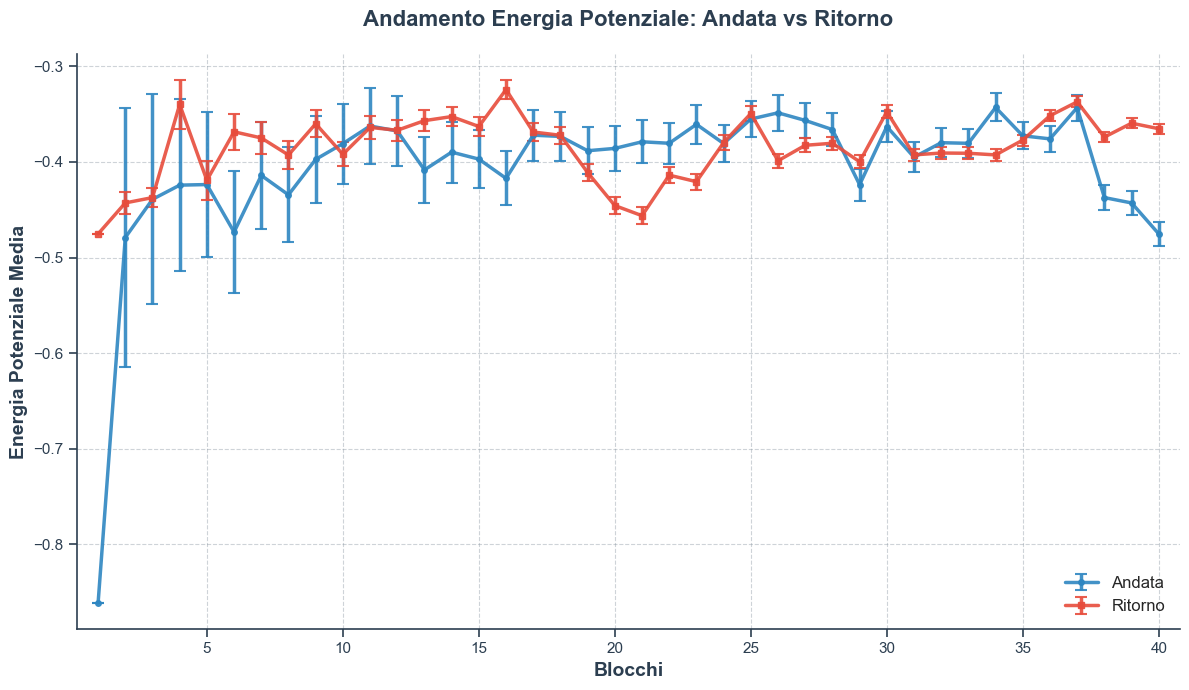

In [14]:
# Carica i dati dai file
andata = np.loadtxt('/Users/marta/Documents/LSN/04/NSL_SIMULATOR/OUTPUT_first_run/potential_energy.dat')
ritorno = np.loadtxt('/Users/marta/Documents/LSN/04/NSL_SIMULATOR/OUTPUT_reverse/potential_energy.dat')

x_andata = andata[:, 0]
y_andata = andata[:, 1]
err_andata = andata[:, 3]

x_ritorno = ritorno[:, 0]
y_ritorno = ritorno[:, 1]
err_ritorno = ritorno[:, 3]

# Crea il grafico con stile moderno
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot dei dati con colori più eleganti
plt.errorbar(x_andata, y_andata, yerr=err_andata, fmt='o-', 
             color='#2E86C1', label='Andata', linewidth=2.5, 
             markersize=4, capsize=4, capthick=1.5, alpha=0.9)
plt.errorbar(x_ritorno, y_ritorno, yerr=err_ritorno, fmt='s-', 
             color='#E74C3C', label='Ritorno', linewidth=2.5, 
             markersize=4, capsize=4, capthick=1.5, alpha=0.9)

# Personalizzazione avanzata del grafico
plt.xlabel('Blocchi', fontsize=14, fontweight='bold', color='#2C3E50')
plt.ylabel('Energia Potenziale Media', fontsize=14, fontweight='bold', color='#2C3E50')
plt.title('Andamento Energia Potenziale: Andata vs Ritorno', 
          fontsize=16, fontweight='bold', color='#2C3E50', pad=20)

# Legend migliorata
legend = plt.legend(fontsize=12, framealpha=0.9, 
                   edgecolor='#BDC3C7', facecolor='white')
legend.get_frame().set_linewidth(1.5)

# Grid personalizzata
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.8, color='#85929E')

# Spines personalizzati
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#2C3E50')
ax.spines['bottom'].set_color('#2C3E50')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Tick personalizzati
ax.tick_params(colors='#2C3E50', labelsize=11, width=1.2, length=6)

# Aggiunge un po' di padding
plt.margins(x=0.02, y=0.05)

plt.tight_layout()
plt.show()

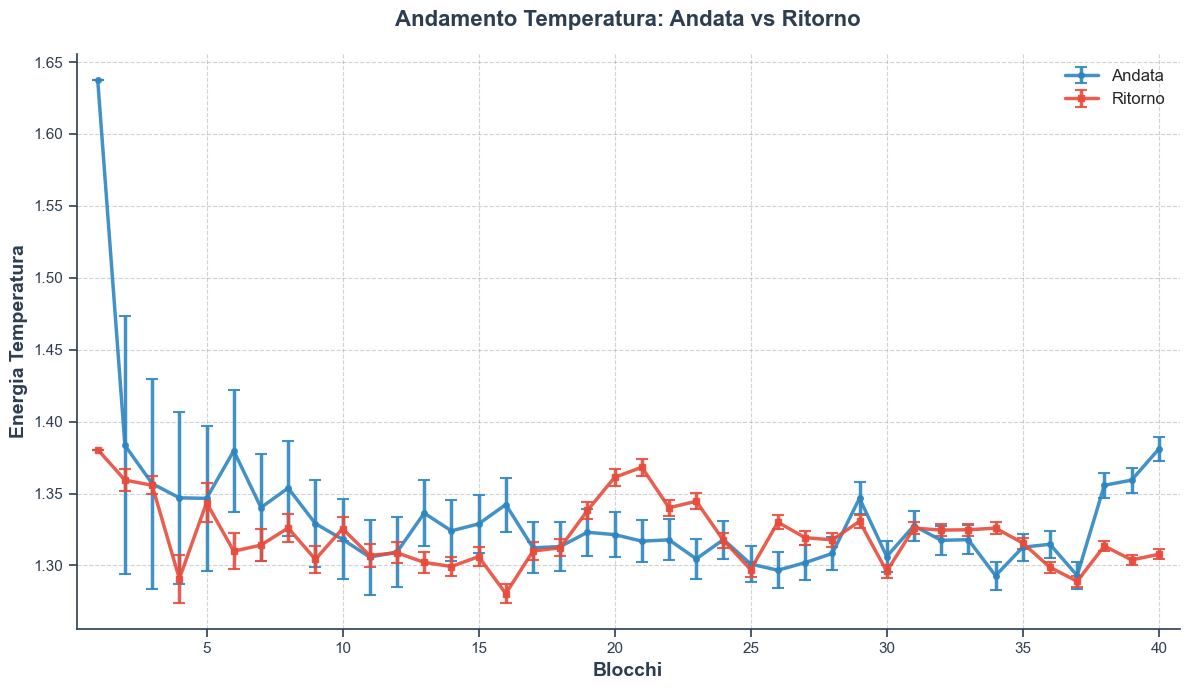

In [15]:
# Carica i dati dai file
andata = np.loadtxt('/Users/marta/Documents/LSN/04/NSL_SIMULATOR/OUTPUT_first_run/temperature.dat')
ritorno = np.loadtxt('/Users/marta/Documents/LSN/04/NSL_SIMULATOR/OUTPUT_reverse/temperature.dat')

x_andata = andata[:, 0]
y_andata = andata[:, 1]
err_andata = andata[:, 3]

x_ritorno = ritorno[:, 0]
y_ritorno = ritorno[:, 1]
err_ritorno = ritorno[:, 3]

# Crea il grafico con stile moderno
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot dei dati con colori più eleganti
plt.errorbar(x_andata, y_andata, yerr=err_andata, fmt='o-', 
             color='#2E86C1', label='Andata', linewidth=2.5, 
             markersize=4, capsize=4, capthick=1.5, alpha=0.9)
plt.errorbar(x_ritorno, y_ritorno, yerr=err_ritorno, fmt='s-', 
             color='#E74C3C', label='Ritorno', linewidth=2.5, 
             markersize=4, capsize=4, capthick=1.5, alpha=0.9)

# Personalizzazione avanzata del grafico
plt.xlabel('Blocchi', fontsize=14, fontweight='bold', color='#2C3E50')
plt.ylabel('Energia Temperatura', fontsize=14, fontweight='bold', color='#2C3E50')
plt.title('Andamento Temperatura: Andata vs Ritorno', 
          fontsize=16, fontweight='bold', color='#2C3E50', pad=20)

# Legend migliorata
legend = plt.legend(fontsize=12, framealpha=0.9, 
                   edgecolor='#BDC3C7', facecolor='white')
legend.get_frame().set_linewidth(1.5)

# Grid personalizzata
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.8, color='#85929E')

# Spines personalizzati
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#2C3E50')
ax.spines['bottom'].set_color('#2C3E50')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Tick personalizzati
ax.tick_params(colors='#2C3E50', labelsize=11, width=1.2, length=6)

# Aggiunge un po' di padding
plt.margins(x=0.02, y=0.05)

plt.tight_layout()
plt.show()

### Conclusions
For both quantities, exactly the same behavior is observed. After a few blocks in the forward direction, the equilibrium value of the respective quantity is reached. In both graphs, the values obtained between forward and reverse are within `2 \sigma` from each other. It is indeed impossible to return to the starting configuration. Reversing the velocities does not generate a 'rewinding of the tape', that is, the backward flow of time. The only effect it has is to continue the simulation with initial velocities opposite to the final ones of exercise 4.2. The laws that govern the simulation are indeed the same and do not cause movement against entropy despite the Verlet algorithm being completely reversible.